# Setup

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, scheduler, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}
    
    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, scheduler, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval, )

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102018 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x1086c8eb8>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x1086ac9b0>)


In [3]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule, GradientDescentLearningRule, RMSPropLearningRule
from mlp.optimisers import Optimiser
from mlp.schedulers import ConstantLearningRateScheduler

# Experiment

Epoch 1: 8.0s to complete
    error(train)=3.68e+00, acc(train)=9.23e-02, error(valid)=3.68e+00, acc(valid)=9.39e-02


Epoch 2: 6.8s to complete
    error(train)=3.40e+00, acc(train)=1.87e-01, error(valid)=3.40e+00, acc(valid)=1.91e-01


Epoch 3: 8.0s to complete
    error(train)=3.05e+00, acc(train)=2.93e-01, error(valid)=3.05e+00, acc(valid)=2.90e-01


Epoch 4: 7.1s to complete
    error(train)=2.69e+00, acc(train)=3.73e-01, error(valid)=2.69e+00, acc(valid)=3.71e-01


Epoch 5: 6.2s to complete
    error(train)=2.38e+00, acc(train)=4.24e-01, error(valid)=2.38e+00, acc(valid)=4.23e-01


Epoch 6: 7.5s to complete
    error(train)=2.15e+00, acc(train)=4.64e-01, error(valid)=2.14e+00, acc(valid)=4.62e-01


Epoch 7: 6.2s to complete
    error(train)=1.97e+00, acc(train)=4.95e-01, error(valid)=1.97e+00, acc(valid)=4.95e-01


Epoch 8: 6.3s to complete
    error(train)=1.84e+00, acc(train)=5.21e-01, error(valid)=1.84e+00, acc(valid)=5.20e-01


Epoch 9: 5.7s to complete
    error(train)=1.74e+00, acc(train)=5.42e-01, error(valid)=1.73e+00, acc(valid)=5.40e-01


Epoch 10: 6.0s to complete
    error(train)=1.65e+00, acc(train)=5.59e-01, error(valid)=1.65e+00, acc(valid)=5.58e-01


Epoch 11: 6.1s to complete
    error(train)=1.58e+00, acc(train)=5.74e-01, error(valid)=1.58e+00, acc(valid)=5.72e-01


Epoch 12: 6.2s to complete
    error(train)=1.53e+00, acc(train)=5.86e-01, error(valid)=1.53e+00, acc(valid)=5.83e-01


Epoch 13: 6.4s to complete
    error(train)=1.48e+00, acc(train)=5.97e-01, error(valid)=1.48e+00, acc(valid)=5.95e-01


Epoch 14: 6.2s to complete
    error(train)=1.44e+00, acc(train)=6.07e-01, error(valid)=1.44e+00, acc(valid)=6.04e-01


Epoch 15: 6.5s to complete
    error(train)=1.40e+00, acc(train)=6.15e-01, error(valid)=1.40e+00, acc(valid)=6.10e-01


Epoch 16: 7.3s to complete
    error(train)=1.37e+00, acc(train)=6.23e-01, error(valid)=1.37e+00, acc(valid)=6.17e-01


Epoch 17: 6.4s to complete
    error(train)=1.34e+00, acc(train)=6.29e-01, error(valid)=1.34e+00, acc(valid)=6.25e-01


Epoch 18: 6.9s to complete
    error(train)=1.32e+00, acc(train)=6.36e-01, error(valid)=1.32e+00, acc(valid)=6.29e-01


Epoch 19: 7.6s to complete
    error(train)=1.29e+00, acc(train)=6.41e-01, error(valid)=1.30e+00, acc(valid)=6.35e-01


Epoch 20: 6.4s to complete
    error(train)=1.27e+00, acc(train)=6.46e-01, error(valid)=1.28e+00, acc(valid)=6.41e-01


Epoch 21: 5.7s to complete
    error(train)=1.25e+00, acc(train)=6.52e-01, error(valid)=1.26e+00, acc(valid)=6.47e-01


Epoch 22: 6.3s to complete
    error(train)=1.23e+00, acc(train)=6.56e-01, error(valid)=1.24e+00, acc(valid)=6.51e-01


Epoch 23: 5.9s to complete
    error(train)=1.21e+00, acc(train)=6.61e-01, error(valid)=1.22e+00, acc(valid)=6.56e-01


Epoch 24: 5.9s to complete
    error(train)=1.20e+00, acc(train)=6.65e-01, error(valid)=1.20e+00, acc(valid)=6.61e-01


Epoch 25: 6.0s to complete
    error(train)=1.18e+00, acc(train)=6.68e-01, error(valid)=1.19e+00, acc(valid)=6.64e-01


Epoch 26: 6.0s to complete
    error(train)=1.17e+00, acc(train)=6.73e-01, error(valid)=1.18e+00, acc(valid)=6.68e-01


Epoch 27: 6.1s to complete
    error(train)=1.15e+00, acc(train)=6.76e-01, error(valid)=1.16e+00, acc(valid)=6.70e-01


Epoch 28: 5.8s to complete
    error(train)=1.14e+00, acc(train)=6.79e-01, error(valid)=1.15e+00, acc(valid)=6.74e-01


Epoch 29: 6.4s to complete
    error(train)=1.13e+00, acc(train)=6.83e-01, error(valid)=1.14e+00, acc(valid)=6.77e-01


Epoch 30: 6.4s to complete
    error(train)=1.12e+00, acc(train)=6.85e-01, error(valid)=1.13e+00, acc(valid)=6.80e-01


Epoch 31: 5.9s to complete
    error(train)=1.11e+00, acc(train)=6.88e-01, error(valid)=1.11e+00, acc(valid)=6.82e-01


Epoch 32: 6.2s to complete
    error(train)=1.09e+00, acc(train)=6.92e-01, error(valid)=1.10e+00, acc(valid)=6.86e-01


Epoch 33: 6.0s to complete
    error(train)=1.08e+00, acc(train)=6.95e-01, error(valid)=1.09e+00, acc(valid)=6.87e-01


Epoch 34: 6.4s to complete
    error(train)=1.07e+00, acc(train)=6.97e-01, error(valid)=1.08e+00, acc(valid)=6.91e-01


Epoch 35: 6.0s to complete
    error(train)=1.06e+00, acc(train)=7.00e-01, error(valid)=1.07e+00, acc(valid)=6.94e-01


Epoch 36: 6.3s to complete
    error(train)=1.05e+00, acc(train)=7.02e-01, error(valid)=1.06e+00, acc(valid)=6.95e-01


Epoch 37: 6.1s to complete
    error(train)=1.05e+00, acc(train)=7.04e-01, error(valid)=1.06e+00, acc(valid)=6.97e-01


Epoch 38: 6.0s to complete
    error(train)=1.04e+00, acc(train)=7.06e-01, error(valid)=1.05e+00, acc(valid)=6.99e-01


Epoch 39: 6.1s to complete
    error(train)=1.03e+00, acc(train)=7.08e-01, error(valid)=1.04e+00, acc(valid)=7.03e-01


Epoch 40: 6.0s to complete
    error(train)=1.02e+00, acc(train)=7.11e-01, error(valid)=1.03e+00, acc(valid)=7.04e-01



--------------------------------------------------------------------------------
decay_rate=0.9000
--------------------------------------------------------------------------------


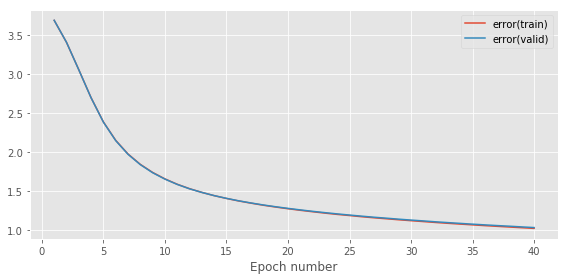

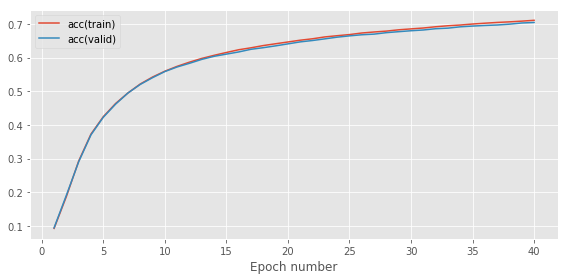

    final error(train) = 1.02e+00
    final error(valid) = 1.03e+00
    final acc(train)   = 7.11e-01
    final acc(valid)   = 7.04e-01
    run time per epoch = 8.78


Epoch 1: 5.9s to complete
    error(train)=3.70e+00, acc(train)=8.57e-02, error(valid)=3.70e+00, acc(valid)=8.16e-02


Epoch 2: 6.0s to complete
    error(train)=3.41e+00, acc(train)=1.80e-01, error(valid)=3.41e+00, acc(valid)=1.74e-01


Epoch 3: 6.3s to complete
    error(train)=3.04e+00, acc(train)=2.94e-01, error(valid)=3.04e+00, acc(valid)=2.89e-01


Epoch 4: 5.9s to complete
    error(train)=2.67e+00, acc(train)=3.77e-01, error(valid)=2.67e+00, acc(valid)=3.72e-01


Epoch 5: 6.0s to complete
    error(train)=2.36e+00, acc(train)=4.32e-01, error(valid)=2.36e+00, acc(valid)=4.29e-01


Epoch 6: 6.1s to complete
    error(train)=2.12e+00, acc(train)=4.69e-01, error(valid)=2.12e+00, acc(valid)=4.66e-01


Epoch 7: 5.7s to complete
    error(train)=1.95e+00, acc(train)=4.97e-01, error(valid)=1.95e+00, acc(valid)=4.91e-01


Epoch 8: 6.1s to complete
    error(train)=1.82e+00, acc(train)=5.19e-01, error(valid)=1.83e+00, acc(valid)=5.15e-01


Epoch 9: 5.8s to complete
    error(train)=1.73e+00, acc(train)=5.39e-01, error(valid)=1.73e+00, acc(valid)=5.33e-01


Epoch 10: 6.1s to complete
    error(train)=1.65e+00, acc(train)=5.55e-01, error(valid)=1.65e+00, acc(valid)=5.51e-01


Epoch 11: 5.4s to complete
    error(train)=1.58e+00, acc(train)=5.69e-01, error(valid)=1.58e+00, acc(valid)=5.62e-01


Epoch 12: 3.6s to complete
    error(train)=1.53e+00, acc(train)=5.82e-01, error(valid)=1.53e+00, acc(valid)=5.75e-01


Epoch 13: 3.4s to complete
    error(train)=1.48e+00, acc(train)=5.92e-01, error(valid)=1.48e+00, acc(valid)=5.84e-01


Epoch 14: 9.1s to complete
    error(train)=1.44e+00, acc(train)=6.02e-01, error(valid)=1.44e+00, acc(valid)=5.93e-01


Epoch 15: 5.8s to complete
    error(train)=1.41e+00, acc(train)=6.10e-01, error(valid)=1.41e+00, acc(valid)=6.02e-01


Epoch 16: 5.3s to complete
    error(train)=1.37e+00, acc(train)=6.17e-01, error(valid)=1.38e+00, acc(valid)=6.10e-01


Epoch 17: 3.5s to complete
    error(train)=1.35e+00, acc(train)=6.24e-01, error(valid)=1.35e+00, acc(valid)=6.16e-01


Epoch 18: 3.5s to complete
    error(train)=1.32e+00, acc(train)=6.32e-01, error(valid)=1.33e+00, acc(valid)=6.22e-01


Epoch 19: 3.6s to complete
    error(train)=1.30e+00, acc(train)=6.37e-01, error(valid)=1.30e+00, acc(valid)=6.28e-01


Epoch 20: 3.7s to complete
    error(train)=1.27e+00, acc(train)=6.43e-01, error(valid)=1.28e+00, acc(valid)=6.35e-01


Epoch 21: 3.5s to complete
    error(train)=1.25e+00, acc(train)=6.48e-01, error(valid)=1.26e+00, acc(valid)=6.38e-01


Epoch 22: 3.6s to complete
    error(train)=1.23e+00, acc(train)=6.53e-01, error(valid)=1.24e+00, acc(valid)=6.45e-01


Epoch 23: 3.5s to complete
    error(train)=1.22e+00, acc(train)=6.58e-01, error(valid)=1.22e+00, acc(valid)=6.50e-01


Epoch 24: 3.7s to complete
    error(train)=1.20e+00, acc(train)=6.63e-01, error(valid)=1.21e+00, acc(valid)=6.55e-01


Epoch 25: 3.8s to complete
    error(train)=1.18e+00, acc(train)=6.66e-01, error(valid)=1.19e+00, acc(valid)=6.60e-01


Epoch 26: 3.6s to complete
    error(train)=1.17e+00, acc(train)=6.70e-01, error(valid)=1.18e+00, acc(valid)=6.63e-01


Epoch 27: 3.4s to complete
    error(train)=1.15e+00, acc(train)=6.74e-01, error(valid)=1.16e+00, acc(valid)=6.67e-01


Epoch 28: 3.9s to complete
    error(train)=1.14e+00, acc(train)=6.77e-01, error(valid)=1.15e+00, acc(valid)=6.72e-01


Epoch 29: 3.5s to complete
    error(train)=1.13e+00, acc(train)=6.81e-01, error(valid)=1.13e+00, acc(valid)=6.76e-01


Epoch 30: 3.5s to complete
    error(train)=1.11e+00, acc(train)=6.84e-01, error(valid)=1.12e+00, acc(valid)=6.79e-01


Epoch 31: 3.4s to complete
    error(train)=1.10e+00, acc(train)=6.87e-01, error(valid)=1.11e+00, acc(valid)=6.81e-01


Epoch 32: 3.8s to complete
    error(train)=1.09e+00, acc(train)=6.91e-01, error(valid)=1.10e+00, acc(valid)=6.85e-01


Epoch 33: 3.5s to complete
    error(train)=1.08e+00, acc(train)=6.93e-01, error(valid)=1.09e+00, acc(valid)=6.87e-01


Epoch 34: 3.9s to complete
    error(train)=1.07e+00, acc(train)=6.97e-01, error(valid)=1.08e+00, acc(valid)=6.90e-01


Epoch 35: 3.5s to complete
    error(train)=1.06e+00, acc(train)=6.99e-01, error(valid)=1.07e+00, acc(valid)=6.93e-01


Epoch 36: 3.8s to complete
    error(train)=1.05e+00, acc(train)=7.02e-01, error(valid)=1.06e+00, acc(valid)=6.96e-01


Epoch 37: 3.9s to complete
    error(train)=1.04e+00, acc(train)=7.04e-01, error(valid)=1.05e+00, acc(valid)=6.99e-01


Epoch 38: 3.6s to complete
    error(train)=1.03e+00, acc(train)=7.07e-01, error(valid)=1.04e+00, acc(valid)=7.01e-01


Epoch 39: 3.9s to complete
    error(train)=1.02e+00, acc(train)=7.09e-01, error(valid)=1.03e+00, acc(valid)=7.03e-01


Epoch 40: 3.7s to complete
    error(train)=1.01e+00, acc(train)=7.11e-01, error(valid)=1.02e+00, acc(valid)=7.04e-01



--------------------------------------------------------------------------------
decay_rate=0.9900
--------------------------------------------------------------------------------


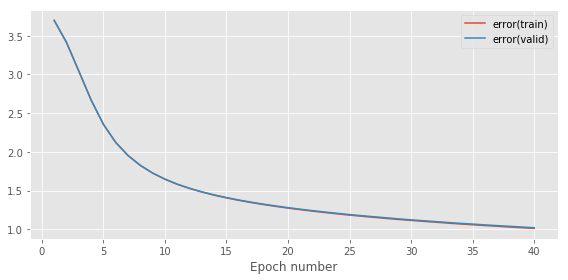

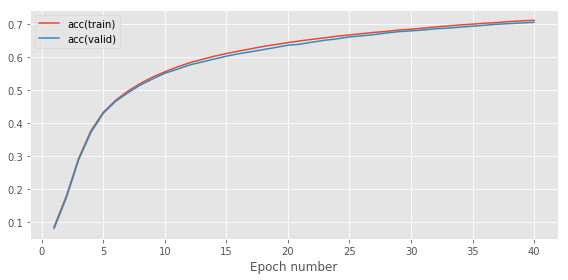

    final error(train) = 1.01e+00
    final error(valid) = 1.02e+00
    final acc(train)   = 7.11e-01
    final acc(valid)   = 7.04e-01
    run time per epoch = 6.16


Epoch 1: 3.7s to complete
    error(train)=3.72e+00, acc(train)=1.01e-01, error(valid)=3.72e+00, acc(valid)=1.04e-01


Epoch 2: 3.7s to complete
    error(train)=3.48e+00, acc(train)=1.60e-01, error(valid)=3.48e+00, acc(valid)=1.62e-01


Epoch 3: 5.4s to complete
    error(train)=3.14e+00, acc(train)=2.52e-01, error(valid)=3.13e+00, acc(valid)=2.51e-01


Epoch 4: 4.8s to complete
    error(train)=2.77e+00, acc(train)=3.39e-01, error(valid)=2.77e+00, acc(valid)=3.36e-01


Epoch 5: 5.3s to complete
    error(train)=2.44e+00, acc(train)=4.10e-01, error(valid)=2.43e+00, acc(valid)=4.09e-01


Epoch 6: 5.3s to complete
    error(train)=2.19e+00, acc(train)=4.63e-01, error(valid)=2.18e+00, acc(valid)=4.62e-01


Epoch 7: 5.2s to complete
    error(train)=1.99e+00, acc(train)=4.99e-01, error(valid)=1.99e+00, acc(valid)=4.98e-01


Epoch 8: 3.7s to complete
    error(train)=1.85e+00, acc(train)=5.24e-01, error(valid)=1.84e+00, acc(valid)=5.25e-01


Epoch 9: 4.2s to complete
    error(train)=1.75e+00, acc(train)=5.45e-01, error(valid)=1.74e+00, acc(valid)=5.45e-01


Epoch 10: 4.6s to complete
    error(train)=1.66e+00, acc(train)=5.62e-01, error(valid)=1.65e+00, acc(valid)=5.58e-01


Epoch 11: 3.6s to complete
    error(train)=1.59e+00, acc(train)=5.75e-01, error(valid)=1.59e+00, acc(valid)=5.70e-01


Epoch 12: 3.8s to complete
    error(train)=1.54e+00, acc(train)=5.86e-01, error(valid)=1.53e+00, acc(valid)=5.81e-01


Epoch 13: 4.5s to complete
    error(train)=1.49e+00, acc(train)=5.96e-01, error(valid)=1.49e+00, acc(valid)=5.90e-01


Epoch 14: 3.8s to complete
    error(train)=1.45e+00, acc(train)=6.04e-01, error(valid)=1.45e+00, acc(valid)=5.99e-01


Epoch 15: 5.2s to complete
    error(train)=1.42e+00, acc(train)=6.11e-01, error(valid)=1.41e+00, acc(valid)=6.07e-01


Epoch 16: 4.1s to complete
    error(train)=1.39e+00, acc(train)=6.18e-01, error(valid)=1.38e+00, acc(valid)=6.13e-01


Epoch 17: 3.6s to complete
    error(train)=1.36e+00, acc(train)=6.24e-01, error(valid)=1.36e+00, acc(valid)=6.18e-01


Epoch 18: 3.5s to complete
    error(train)=1.34e+00, acc(train)=6.30e-01, error(valid)=1.33e+00, acc(valid)=6.25e-01


Epoch 19: 3.5s to complete
    error(train)=1.31e+00, acc(train)=6.35e-01, error(valid)=1.31e+00, acc(valid)=6.30e-01


Epoch 20: 3.6s to complete
    error(train)=1.29e+00, acc(train)=6.40e-01, error(valid)=1.29e+00, acc(valid)=6.35e-01


Epoch 21: 3.5s to complete
    error(train)=1.27e+00, acc(train)=6.44e-01, error(valid)=1.27e+00, acc(valid)=6.40e-01


Epoch 22: 4.3s to complete
    error(train)=1.25e+00, acc(train)=6.50e-01, error(valid)=1.25e+00, acc(valid)=6.43e-01


Epoch 23: 5.0s to complete
    error(train)=1.24e+00, acc(train)=6.54e-01, error(valid)=1.24e+00, acc(valid)=6.49e-01


Epoch 24: 3.6s to complete
    error(train)=1.22e+00, acc(train)=6.58e-01, error(valid)=1.22e+00, acc(valid)=6.52e-01


Epoch 25: 8.2s to complete
    error(train)=1.21e+00, acc(train)=6.63e-01, error(valid)=1.21e+00, acc(valid)=6.58e-01


Epoch 26: 10.4s to complete
    error(train)=1.19e+00, acc(train)=6.67e-01, error(valid)=1.19e+00, acc(valid)=6.63e-01


Epoch 27: 4.7s to complete
    error(train)=1.18e+00, acc(train)=6.70e-01, error(valid)=1.18e+00, acc(valid)=6.66e-01


Epoch 28: 4.7s to complete
    error(train)=1.16e+00, acc(train)=6.73e-01, error(valid)=1.17e+00, acc(valid)=6.69e-01


Epoch 29: 4.3s to complete
    error(train)=1.15e+00, acc(train)=6.76e-01, error(valid)=1.16e+00, acc(valid)=6.72e-01


Epoch 30: 4.5s to complete
    error(train)=1.14e+00, acc(train)=6.78e-01, error(valid)=1.14e+00, acc(valid)=6.76e-01


Epoch 31: 4.2s to complete
    error(train)=1.13e+00, acc(train)=6.83e-01, error(valid)=1.13e+00, acc(valid)=6.81e-01


Epoch 32: 4.6s to complete
    error(train)=1.12e+00, acc(train)=6.85e-01, error(valid)=1.12e+00, acc(valid)=6.82e-01


Epoch 33: 4.2s to complete
    error(train)=1.10e+00, acc(train)=6.88e-01, error(valid)=1.11e+00, acc(valid)=6.85e-01


Epoch 34: 4.1s to complete
    error(train)=1.09e+00, acc(train)=6.90e-01, error(valid)=1.10e+00, acc(valid)=6.88e-01


Epoch 35: 4.6s to complete
    error(train)=1.08e+00, acc(train)=6.94e-01, error(valid)=1.09e+00, acc(valid)=6.92e-01


Epoch 36: 4.2s to complete
    error(train)=1.07e+00, acc(train)=6.96e-01, error(valid)=1.08e+00, acc(valid)=6.94e-01


Epoch 37: 5.6s to complete
    error(train)=1.06e+00, acc(train)=6.99e-01, error(valid)=1.07e+00, acc(valid)=6.96e-01


Epoch 38: 4.8s to complete
    error(train)=1.05e+00, acc(train)=7.01e-01, error(valid)=1.06e+00, acc(valid)=6.99e-01


Epoch 39: 4.1s to complete
    error(train)=1.04e+00, acc(train)=7.03e-01, error(valid)=1.05e+00, acc(valid)=7.01e-01


Epoch 40: 4.4s to complete
    error(train)=1.04e+00, acc(train)=7.05e-01, error(valid)=1.05e+00, acc(valid)=7.03e-01



--------------------------------------------------------------------------------
decay_rate=0.9990
--------------------------------------------------------------------------------


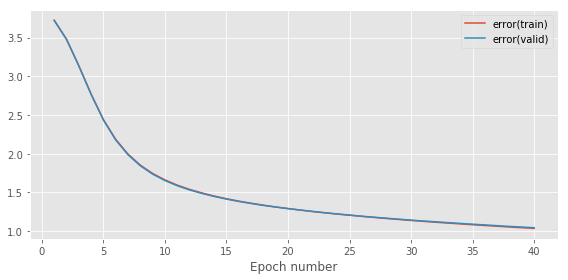

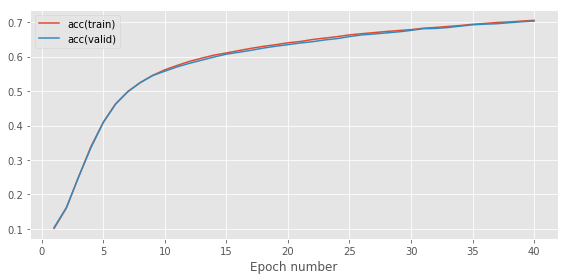

    final error(train) = 1.04e+00
    final error(valid) = 1.05e+00
    final acc(train)   = 7.05e-01
    final acc(valid)   = 7.03e-01
    run time per epoch = 21.55


In [4]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

#setup hyperparameters
learning_rate = 1e-5
num_epochs = 40
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100
decay_rates = [0.9, 0.99, 0.999]

for decay_rate in decay_rates:

    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    scheduler = ConstantLearningRateScheduler(learning_rate)

    error = CrossEntropySoftmaxError()
    # Use a basic gradient descent learning rule
    learning_rule = RMSPropLearningRule(learning_rate=learning_rate, beta=0.9)

    #Remember to use notebook=False when you write a script to be run in a terminal
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
            model, error, learning_rule, train_data, scheduler, valid_data, num_epochs, stats_interval, notebook=True)

    fig_1.tight_layout()
    fig_1_name = "rms_fig_1_decay_rate_" + str(decay_rate) + ".pdf"
    fig_1.savefig(fig_1_name)

    fig_2.tight_layout()
    fig_2_name = "rms_fig_2_decay_rate_" + str(decay_rate) + ".pdf"
    fig_2.savefig(fig_2_name)

    print('-' * 80)
    print('decay_rate={0:.4f}'
          .format(decay_rate))
    print('-' * 80)

    plt.show()

    print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
    print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
    print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
    print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
    print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))